In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, accuracy_score, balanced_accuracy_score,
    f1_score, fbeta_score, brier_score_loss, precision_score, recall_score, roc_auc_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df1 = pd.read_csv('/home/luo_wenjin/IHA_ML/pato_transform.csv',sep=',',header=0)
df2 = pd.read_csv('/home/luo_wenjin/IHA_ML/conpass_transform.csv',sep=',',header=0)
df3 = pd.read_csv('/home/luo_wenjin/IHA_ML/monash_transform.csv',sep=',',header=0)
df4 = pd.read_csv('/home/luo_wenjin/IHA_ML/eimds_transform.csv',sep=',',header=0)
df5 = pd.read_csv('/home/luo_wenjin/IHA_ML/fos_transform.csv',sep=',',header=0)
df6 = pd.read_csv('/home/luo_wenjin/IHA_ML/ukb_transform.csv',sep=',',header=0)

df1
df2
df3
df4
df5
df6

,IHA,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD,PAC
0,0,0.000,2.038,1.831,-0.493,0.730,0.285,0.453,-1.105,0.313,1,0,39.2
1,0,-0.107,0.324,-0.369,-0.493,-2.390,0.081,-0.823,-1.185,0.973,1,0,26.2
2,0,0.323,-0.672,-0.840,-2.219,-0.518,-0.359,-1.155,-0.020,0.835,1,0,22.4
3,0,-1.507,-0.232,-0.055,0.197,-0.518,0.913,-0.795,0.957,0.976,0,0,26.4
4,0,0.431,1.899,1.360,-0.493,-3.139,0.730,0.509,0.727,0.602,1,0,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,0,0.538,-0.881,-0.055,0.197,1.354,-0.315,-0.157,0.427,0.341,0,0,17.0
1633,0,0.431,-1.113,-0.290,0.197,-0.518,1.164,-0.767,-0.872,-1.287,1,1,5.7
1634,0,-2.045,-0.418,-0.212,-0.493,-0.518,-0.107,-0.767,-0.574,-1.588,0,0,2.4
1635,0,0.431,1.459,0.653,-0.493,0.106,-0.599,-1.461,-1.348,0.094,1,0,27.2


,IHA,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD,PAC
0,0,-0.669,-0.156,-0.430,-0.913,0.257,1.411,-1.092,1.642,1.210,0,0,355.180
1,0,-2.196,0.603,-0.332,1.288,1.372,1.184,0.142,2.323,1.209,1,0,212.000
2,0,-2.115,0.360,-0.430,-0.161,-0.474,0.274,-0.655,-0.291,0.415,0,0,52.700
3,0,-1.311,0.131,0.948,0.313,0.603,0.881,-0.863,-0.933,1.315,0,0,202.000
4,0,1.501,-0.664,-0.036,0.146,-0.397,-0.890,-0.295,-0.465,-1.724,1,0,71.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,0,1.019,0.077,0.456,-0.426,0.238,2.419,0.142,-0.647,0.352,0,0,9.780
1674,0,0.457,0.536,0.652,1.789,0.718,2.090,0.339,0.273,0.733,0,0,11.400
1675,0,1.180,1.202,0.849,1.539,-0.589,1.005,0.787,-0.377,-0.511,1,0,5.230
1676,0,-1.553,0.661,1.144,0.550,1.756,1.455,1.628,-0.041,1.010,0,0,7.360


,IHA,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD,PAC
0,1,0.210,1.119,0.479,1.104,1.642,0.494,1.145,-0.483,-0.303,1,0,393
1,1,-1.094,-0.140,-0.126,0.822,1.642,0.271,0.573,0.324,-0.240,1,0,550
2,1,0.133,0.798,0.613,1.952,1.812,-0.615,0.668,0.155,0.525,1,0,520
3,0,-0.480,-0.028,0.009,-1.496,-1.343,-1.289,-0.762,-0.199,0.358,1,0,546
4,1,0.210,0.335,0.546,1.556,1.642,0.386,1.240,-0.785,-0.182,0,0,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,0.210,1.365,1.352,0.087,0.277,0.019,0.287,-0.582,0.401,1,0,473
541,0,-0.557,0.748,1.285,1.500,1.983,-0.271,-0.858,0.069,0.469,0,0,294
542,0,0.901,-0.121,-0.462,-1.270,-1.002,-0.615,0.191,0.155,0.060,1,1,499
543,1,0.133,0.440,0.949,0.595,0.277,0.785,0.859,0.069,-0.545,0,0,486


,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD,PAC
0,-0.302,-0.606,-0.133,0.362,0.831,0.163,1.040,0.016,0.200,0,0,79.0
1,1.011,-2.490,-2.450,-0.462,-0.280,-0.653,-0.077,-0.497,-0.307,0,0,93.6
2,-0.384,-0.021,0.087,-1.476,-1.189,-0.653,-0.273,0.076,-0.942,0,0,63.3
3,1.339,-0.606,-0.575,0.679,-0.684,0.394,-0.656,0.114,-0.415,1,0,142.0
4,1.011,-0.183,-0.464,-0.589,-1.290,-1.541,0.223,-0.895,0.155,1,0,75.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1306,-0.302,0.044,-0.464,-0.399,0.629,-0.900,0.503,-0.885,-1.063,0,0,NaN
1307,-0.056,-0.086,-0.244,0.298,0.932,1.156,0.875,-0.471,0.239,0,0,NaN
1308,-0.548,-1.678,-1.347,1.122,-1.290,1.337,-0.273,-0.758,-0.276,1,0,NaN
1309,-3.338,-2.003,-2.340,-2.173,-0.785,-0.782,-0.697,-0.514,1.492,0,0,133.0


,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD,PAC
0,-0.693,0.662,0.474,-0.601,0.391,-0.240,-0.389,0.051,-1.609,0,0,10
1,-0.473,0.123,0.382,-0.713,-0.221,0.804,-1.027,3.285,-0.113,1,0,5
2,0.187,-0.919,-0.401,-0.211,-1.036,0.916,-1.697,0.337,0.015,1,0,29
3,-0.143,-0.658,-0.447,0.069,0.289,0.340,0.663,-0.165,-0.186,0,1,9
4,-0.473,-0.056,-0.401,0.180,1.410,0.526,0.567,-0.631,0.679,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1506,-0.253,1.057,0.843,0.236,-0.119,1.030,-0.358,0.680,-1.609,1,1,13
1507,-1.133,-1.350,-0.953,-1.439,-0.934,-0.837,-0.804,0.093,-0.266,1,0,5
1508,-1.242,-1.094,-1.552,-1.160,0.085,-1.441,-1.793,-1.262,0.177,1,0,7
1509,-0.913,-0.611,-0.170,0.460,-0.119,-1.351,-1.219,-0.681,0.127,1,0,10


,Age,BMI,WC,SBP,DBP,TG,LDL,FBG,PRC,Sex,ASCVD
0,-0.920941,-0.729704,-0.313258,-0.152800,0.044332,-0.816817,-0.426849,-0.338380,-0.047185,1,0
1,0.730699,-1.086788,-0.754352,-0.179787,-1.384366,-0.151949,0.879892,-0.392438,1.176981,1,1
2,-1.058578,-0.531618,-0.239743,0.198024,0.758681,0.792476,1.103285,0.231074,-0.202727,1,1
3,0.868335,-0.250473,-1.342477,0.764740,-1.241496,-0.873832,1.232332,-0.399810,-0.483287,0,0
4,-1.884397,-0.395233,-1.048415,-0.314719,0.139578,0.223246,-1.091606,-0.799104,-0.962300,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21779,-2.022034,0.058188,-0.680837,-0.557598,-0.050915,-0.080220,-0.456129,-0.182348,-1.503248,0,0
21780,-1.058578,2.532535,2.406820,-0.260746,0.139578,-0.068266,0.053554,1.030276,3.136875,1,1
21781,0.317789,0.219382,0.862992,1.169537,0.615811,1.305611,-0.035369,-0.503626,0.356181,1,0
21782,1.281245,-0.452403,-0.386774,1.358443,0.044332,-0.470129,-1.063411,-0.664572,-0.952922,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 1:12], 
                                                        df1.iloc[:, 0], 
                                                        test_size=0.3, 
                                                        random_state=49)
X_test1, y_test1 = df2.iloc[:,1:12], df2.iloc[:,0]
X_test2, y_test2 = df3.iloc[:,1:12], df3.iloc[:,0]
X_test3, X_test4, X_test5 = df4.iloc[:,0:11], df5.iloc[:,0:11], df6.iloc[:,0:11]
    
def compute_metrics(model, X_test, y_test, auc):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    metrics = pd.DataFrame({
        'Metric': [
            'Accuracy', 'Balanced Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
            'NPV', 'FPR', 'FNR', 'FDR', 'LR+', 'LR-', 'F1 Score', 'F2 Score', 'Brier Score', 'AUC'
        ],
        'Result': [
            accuracy_score(y_test, y_pred),
            balanced_accuracy_score(y_test, y_pred),
            tp / (tp + fn) if (tp + fn) else 0,  # Sensitivity
            tn / (tn + fp) if (tn + fp) else 0,  # Specificity
            precision_score(y_test, y_pred, zero_division=0),
            recall_score(y_test, y_pred, zero_division=0),
            tn / (tn + fn) if (tn + fn) else 0,  # NPV
            fp / (fp + tn) if (fp + tn) else 0,  # FPR
            fn / (fn + tp) if (fn + tp) else 0,  # FNR
            fp / (fp + tp) if (fp + tp) else 0,  # FDR
            (tp / (tp + fn)) / (fp / (fp + tn)) if (fp / (fp + tn)) else 0,  # LR+
            (fn / (fn + tp)) / (tn / (tn + fp)) if (tn / (tn + fp)) else 0,  # LR-
            f1_score(y_test, y_pred, zero_division=0),
            fbeta_score(y_test, y_pred, beta=2, zero_division=0),
            brier_score_loss(y_test, y_proba),
            auc
        ]
    })
    return metrics

# Define models to train
models = {
    'NB': GaussianNB(var_smoothing=1e-9),
    'SGDClassifier': SGDClassifier(alpha=5e-05, 
                                   max_iter=500, 
                                   tol=0.08, 
                                   loss='log_loss', 
                                   random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=190, 
                                   activation='relu', 
                                   solver='adam', 
                                   alpha=0.01, 
                                   max_iter=500, 
                                   random_state=61),
    'XGBClassifier': XGBClassifier(max_depth=61, 
                                   min_child_weight=2, 
                                   subsample=0.6, 
                                   n_estimators=100, 
                                   use_label_encoder=False, 
                                   eval_metric='logloss', 
                                   random_state=42)
}

# Train, evaluate and save metrics for each model
kf = StratifiedKFold(n_splits=10, random_state=61, shuffle=True)
for model_name, model in models.items():
    auc_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc').mean()
    model.fit(X_train, y_train)
    
    auc_test1 = roc_auc_score(y_test1, model.predict_proba(X_test1)[:, 1])
    auc_test2 = roc_auc_score(y_test2, model.predict_proba(X_test2)[:, 1])
    
    metrics_pato = compute_metrics(model, X_test, y_test, auc_train)
    metrics_conpass = compute_metrics(model, X_test1, y_test1, auc_test1)
    metrics_monash = compute_metrics(model, X_test2, y_test2, auc_test2)
    
    combined_metrics = pd.concat(
        [metrics_pato.set_index('Metric'),
         metrics_conpass.set_index('Metric')['Result'],
         metrics_monash.set_index('Metric')['Result']],
        axis=1
    ).reset_index()
    
    combined_metrics.columns = ['Metric', 'Pato', 'Conpass', 'Monash']
    combined_metrics.to_csv(f'../table_and_figure/combined_metrics_{model_name}.csv', index=False)
    print(f'{model_name} metrics saved and printed.')
    print(combined_metrics)

GaussianNB()

NB metrics saved and printed.
               Metric      Pato   Conpass    Monash
0            Accuracy  0.936992  0.813468  0.614679
1   Balanced Accuracy  0.673347  0.517493  0.515001
2         Sensitivity  0.388889  0.061017  0.066038
3         Specificity  0.957806  0.973970  0.963964
4           Precision  0.259259  0.333333  0.538462
5              Recall  0.388889  0.061017  0.066038
6                 NPV  0.976344  0.829433  0.618497
7                 FPR  0.042194  0.026030  0.036036
8                 FNR  0.611111  0.938983  0.933962
9                 FDR  0.740741  0.666667  0.461538
10                LR+  9.216667  2.344068  1.832547
11                LR-  0.638032  0.964078  0.968877
12           F1 Score  0.311111  0.103152  0.117647
13           F2 Score  0.353535  0.072934  0.080092
14        Brier Score  0.053192  0.170809  0.358689
15                AUC  0.886232  0.772528  0.728101


SGDClassifier(alpha=5e-05, loss='log_loss', max_iter=500, random_state=42,
              tol=0.08)

SGDClassifier metrics saved and printed.
               Metric      Pato   Conpass    Monash
0            Accuracy  0.949187  0.821812  0.614679
1   Balanced Accuracy  0.519339  0.521221  0.506431
2         Sensitivity  0.055556  0.057627  0.018868
3         Specificity  0.983122  0.984816  0.993994
4           Precision  0.111111  0.447368  0.666667
5              Recall  0.055556  0.057627  0.018868
6                 NPV  0.964803  0.830488  0.614100
7                 FPR  0.016878  0.015184  0.006006
8                 FNR  0.944444  0.942373  0.981132
9                 FDR  0.888889  0.552632  0.333333
10                LR+  3.291667  3.795157  3.141509
11                LR-  0.960658  0.956903  0.987060
12           F1 Score  0.074074  0.102102  0.036697
13           F2 Score  0.061728  0.069787  0.023419
14        Brier Score  0.046038  0.172436  0.384185
15                AUC  0.776375  0.758508  0.729050


Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
Stochastic Optimizer

MLPClassifier(alpha=0.01, hidden_layer_sizes=190, max_iter=500, random_state=61)

MLPClassifier metrics saved and printed.
               Metric      Pato   Conpass    Monash
0            Accuracy  0.943089  0.824791  0.616514
1   Balanced Accuracy  0.596343  0.519029  0.507932
2         Sensitivity  0.222222  0.047458  0.018868
3         Specificity  0.970464  0.990600  0.996997
4           Precision  0.222222  0.518519  0.800000
5              Recall  0.222222  0.047458  0.018868
6                 NPV  0.970464  0.829800  0.614815
7                 FPR  0.029536  0.009400  0.003003
8                 FNR  0.777778  0.952542  0.981132
9                 FDR  0.777778  0.481481  0.200000
10                LR+  7.523810  5.048761  6.283019
11                LR-  0.801449  0.961581  0.984087
12           F1 Score  0.222222  0.086957  0.036866
13           F2 Score  0.222222  0.057995  0.023447
14        Brier Score  0.044367  0.162888  0.367925
15                AUC  0.847098  0.799321  0.753102


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=61,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBClassifier metrics saved and printed.
               Metric      Pato   Conpass    Monash
0            Accuracy  0.947154  0.824195  0.616514
1   Balanced Accuracy  0.571730  0.513334  0.507075
2         Sensitivity  0.166667  0.033898  0.014151
3         Specificity  0.976793  0.992769  1.000000
4           Precision  0.214286  0.500000  1.000000
5              Recall  0.166667  0.033898  0.014151
6                 NPV  0.968619  0.828106  0.614391
7                 FPR  0.023207  0.007231  0.000000
8                 FNR  0.833333  0.966102  0.985849
9                 FDR  0.785714  0.500000  0.000000
10                LR+  7.181818  4.688136  0.000000
11                LR-  0.853132  0.973138  0.985849
12           F1 Score  0.187500  0.063492  0.027907
13           F2 Score  0.174419  0.041667  0.017626
14        Brier Score  0.042003  0.163053  0.375730
15                AUC  0.877583  0.685415  0.594680


GaussianNB()

<Figure size 800x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate(Specificity)')

Text(0, 0.5, 'True Positive Rate(Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

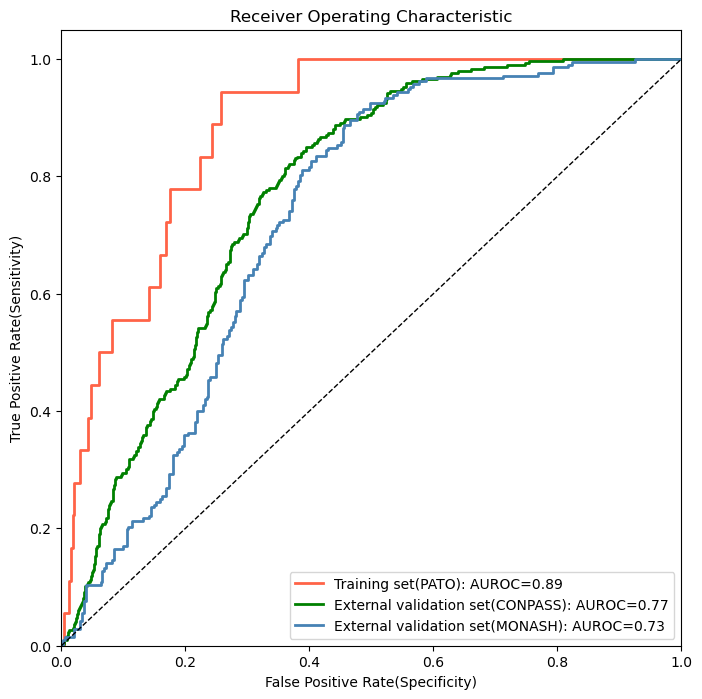

In [4]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve
model = GaussianNB()
model.fit(X_train, y_train)

#save model parameter
variances = model.var_
means = model.theta_
variances_df = pd.DataFrame(model.var_, columns=X_test.columns)
means_df = pd.DataFrame(model.theta_, columns=X_test.columns)
variances_df.to_csv('../table_and_figure/nb_variances.csv', index=False)
means_df.to_csv('../table_and_figure/nb_means.csv', index=False)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]
y_proba1 = model.predict_proba(X_test1)[:, 1]
y_proba2 = model.predict_proba(X_test2)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fpr1, tpr1, _ = roc_curve(y_test1, y_proba1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test2, y_proba2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color="#ff6347", lw=2, label=f"Training set(PATO): AUROC=0.89")
plt.plot(fpr1, tpr1, color='green', lw=2, label=f"External validation set(CONPASS): AUROC=0.77")
plt.plot(fpr2, tpr2, color="#4682b4", lw=2, label=f"External validation set(MONASH): AUROC=0.73")
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("../table_and_figure/nb_roc_curves.tiff", format='tiff', dpi=288)
plt.show()

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████████| 492/492 [06:39<00:00,  1.23it/s]


<Figure size 800x800 with 0 Axes>

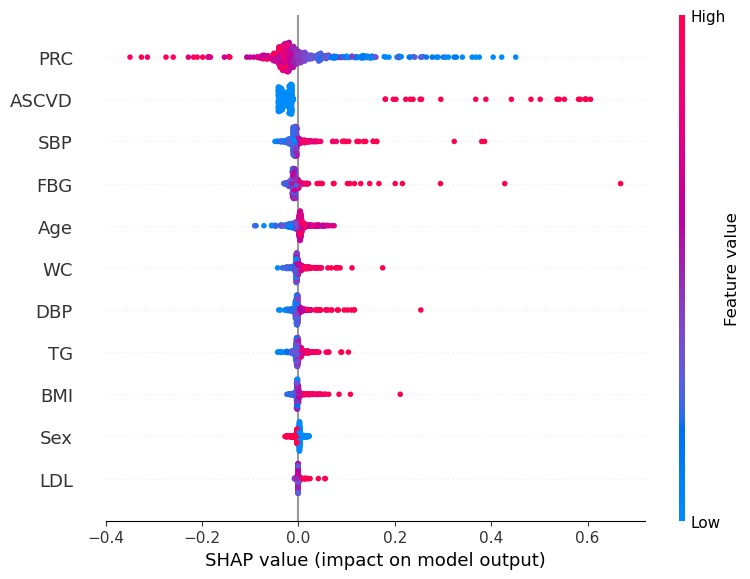

<Figure size 640x480 with 0 Axes>

In [5]:
#shap
background = shap.sample(X_train, 500)
explainer = shap.KernelExplainer(model.predict_proba, background)
shap_values = explainer.shap_values(X_test, nsamples=500)

plt.figure(figsize=(8, 8))
shap.summary_plot(shap_values[1], X_test)
plt.savefig("../table_and_figure/nb_shap_summary_plot.tiff", format='tiff', dpi=288)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

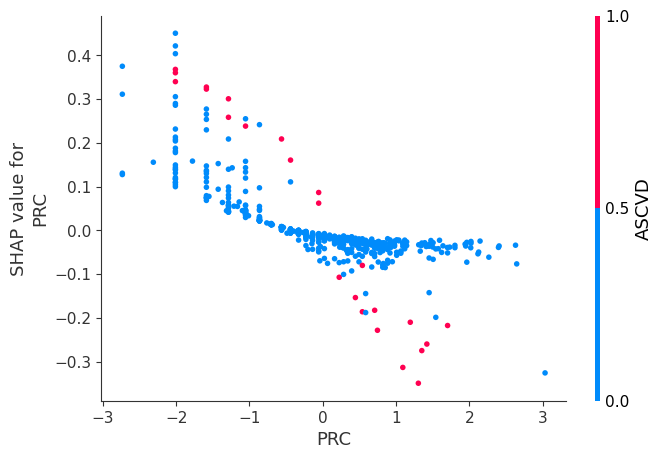

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

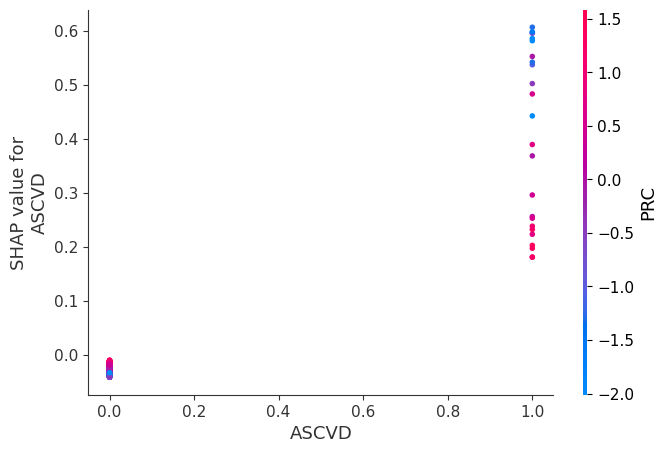

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

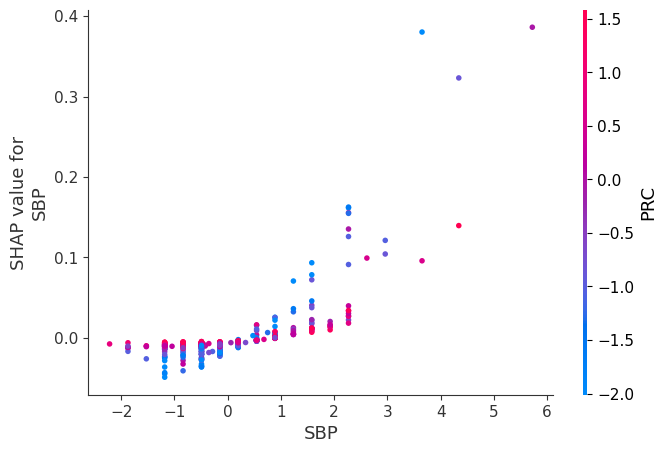

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

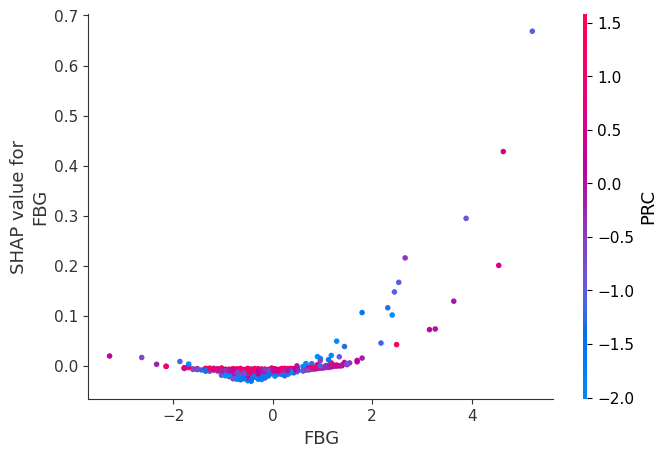

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

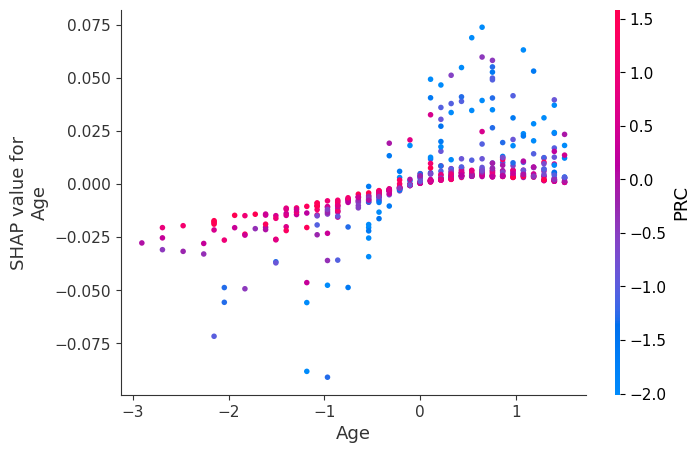

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

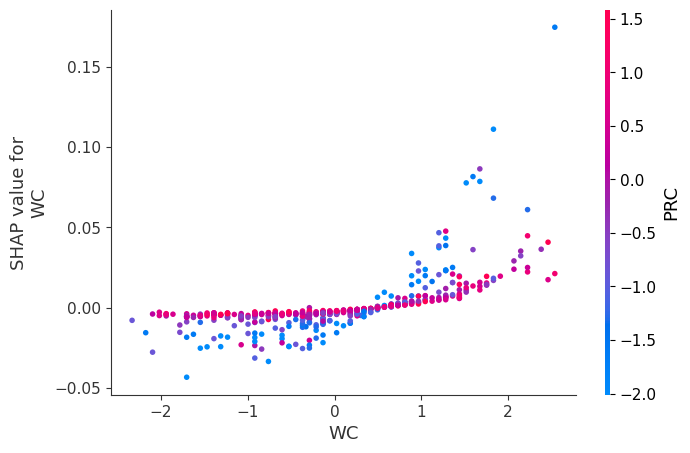

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

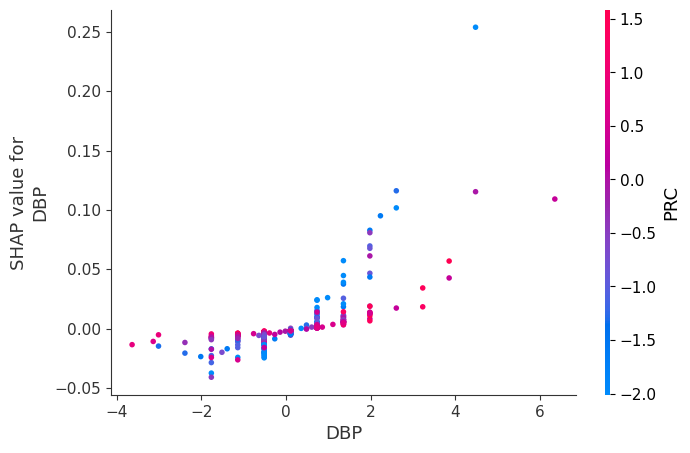

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

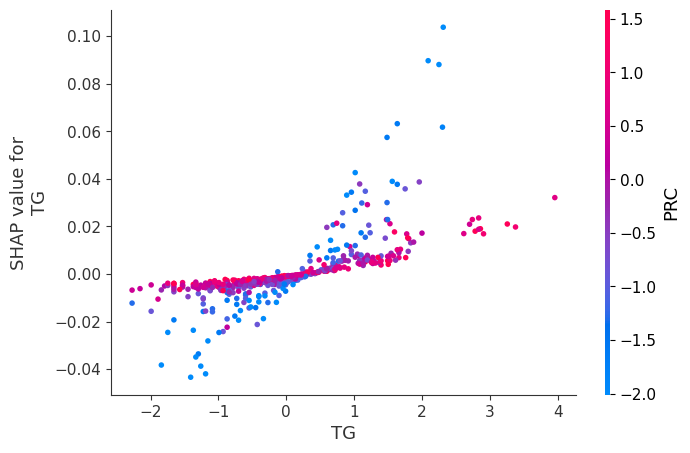

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

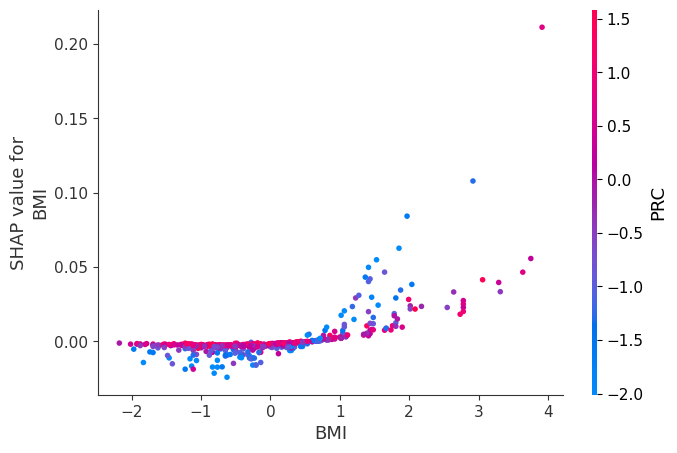

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

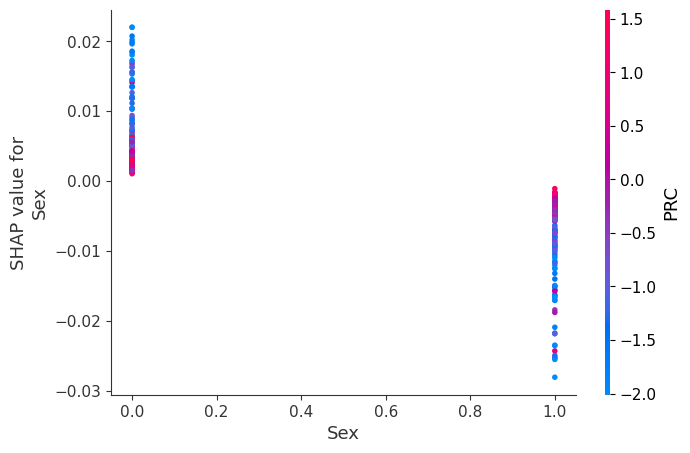

<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

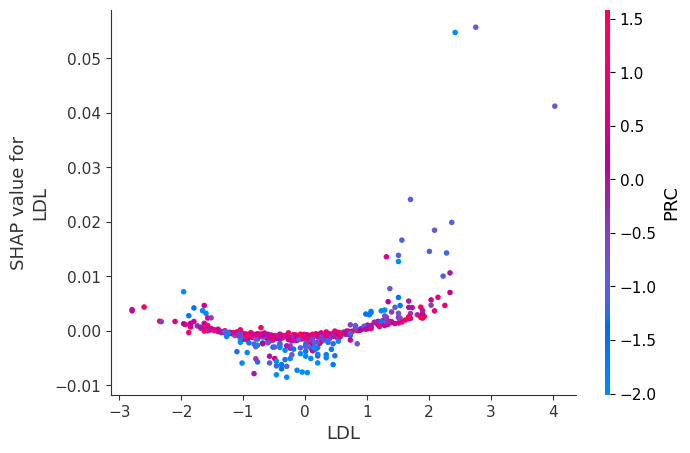

<Figure size 640x480 with 0 Axes>

In [6]:
top_inds = np.argsort(-np.sum(np.abs(shap_values[1]), 0))

for i in range(11):
    plt.figure(figsize=(8, 8))
    shap.dependence_plot(top_inds[i], shap_values[1], X_test)
    plt.savefig(f'../table_and_figure/nb_shap_dependence_plot_{i}.tiff', format='tiff', dpi=288)
    plt.show()
    plt.close()

In [7]:
#show the python environment
import session_info

session_info.show()